# Small World Graphs

## Clustering and Path Length
Two meaningful properties that can be evaluated for graphs, as described by Watts and Strogatz, are:
1. **Clustering:** A measure of the "cliquishness" of a graph. A **clique** is a subset of nodes that are all connected to each other. A graph with high clustering means that two nodes connected to the same third node are also very likely to be connected to each other.
2. **Path length:** A measure of the average distance between two nodes. In an unweighted graph, this would measure the average degrees of separation between nodes.

Watts and Strogatz defined in their paper a means for calculating and quantifying each of these properties.

The clustering coefficient, *C*, is a measure of clustering in a graph. Given a node *v*, with *k* neighbours, those neighbours can have at most *k(k-1)/2* edges amongst themselves. *C(v)* then denotes the fraction of those permissible edges that actually exist in the graph. The clustering coefficient *C* is the *C(v)* averaged over all the vertices in the graph.

The characteristic path length, *L*, is the number of edges in the shortest path between two nodes in the graph, averaged over all pairs of vertices in the graph.

## Random and Regular Graphs
Using these two means of evaluating clustering and path length in graphs, it is possible to analyze how regular and random graphs display these properties.

Below are a series of simulations run on random and regular graphs of size 100 (100 nodes each), with the characteristic path length and clustering coefficients being calculated for each.

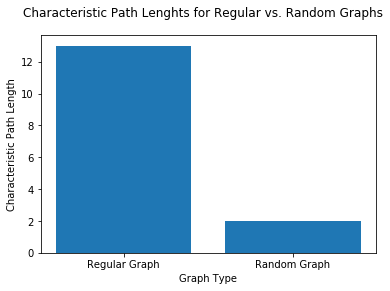

In [5]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy

#Make regular graph of degree 4, 100 nodes
g = Graph.Graph()
for i in range(1,101):
    g.add_vertex(i)
g.add_regular_edges(4)

#Make random graph with p=0.15, 100 nodes
rg = RandomGraph.RandomGraph()
for i in range(1,101):
    rg.add_vertex(i)
rg.add_random_edges(0.15)

#Evalute characteristic path length for each
gPathLength = GraphProperties.characteristicPathLength(g)
rgPathLength = GraphProperties.characteristicPathLength(rg)

#Plot results
names = ['Regular Graph', 'Random Graph']
pathLengths = [gPathLength, rgPathLength]
fig = plt.figure()
y_pos = numpy.arange(len(names))
fig.suptitle('Characteristic Path Lenghts for Regular vs. Random Graphs')
plt.bar(y_pos, pathLengths, align='center')
plt.xticks(y_pos, names)
plt.ylabel('Characteristic Path Length')
plt.xlabel('Graph Type')
plt.show()

As can be seen by the above results, regular graphs (in this case, the degree is 4) have a much higher characteristic path length than random graphs (in this case, the probability *p* of an edge between any two nodes is 0.15).

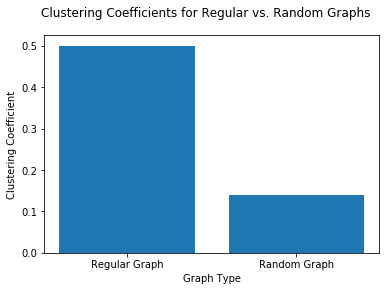

In [4]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy

#Make regular graph of degree 4, 100 nodes
g = Graph.Graph()
for i in range(1,101):
    g.add_vertex(i)
g.add_regular_edges(4)

#Make random graph with p=0.15, 100 nodes
rg = RandomGraph.RandomGraph()
for i in range(1,101):
    rg.add_vertex(i)
rg.add_random_edges(0.15)

#Evalute characteristic path length for each
gPathLength = GraphProperties.clusteringCoefficient(g)
rgPathLength = GraphProperties.clusteringCoefficient(rg)

#Plot results
names = ['Regular Graph', 'Random Graph']
pathLengths = [gPathLength, rgPathLength]
fig = plt.figure()
y_pos = numpy.arange(len(names))
fig.suptitle('Clustering Coefficients for Regular vs. Random Graphs')
plt.bar(y_pos, pathLengths, align='center')
plt.xticks(y_pos, names)
plt.ylabel('Clustering Coefficient')
plt.xlabel('Graph Type')
plt.show()

Here, it can clearly be seen that regular graphs (once again, the degree is 4) tend to have much higher clustering than random graphs (once again, the probability *p* is 0.15).

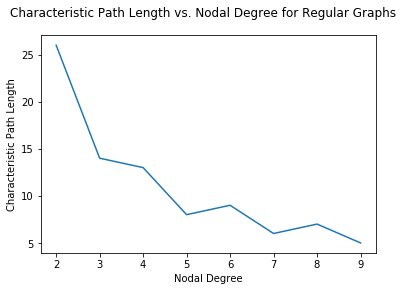

In [11]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy

#Store characteristic path lengths
pathLengths = []
degrees = []

for k in range(2, 10):
    #Make regular graph of degree n, 100 nodes
    g = Graph.Graph()
    for i in range(1,101):
        g.add_vertex(i)
    g.add_regular_edges(k)

    #Evalute characteristic path length
    gPathLength = GraphProperties.characteristicPathLength(g)
    
    #Store results
    pathLengths.append(gPathLength)
    degrees.append(k)

#Plot results
fig = plt.figure()
fig.suptitle('Characteristic Path Length vs. Nodal Degree for Regular Graphs')
plt.plot(degrees, pathLengths)
plt.ylabel('Characteristic Path Length')
plt.xlabel('Nodal Degree')
plt.show()

Running the simulation only on regular graphs, what can be observed here is that as the nodal degree of the regular graph is increased (i.e. each node has more edges to other nodes), the characteristic path length is reduced. This is a very expected result.

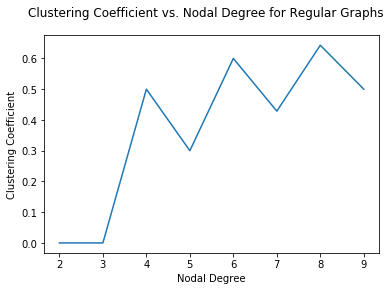

In [10]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy

#Store clustering coefficients
clusteringCoefficients = []
degrees = []

for k in range(2, 10):
    #Make regular graph of degree n, 100 nodes
    g = Graph.Graph()
    for i in range(1,101):
        g.add_vertex(i)
    g.add_regular_edges(k)

    #Evalute clustering coefficient
    gClusteringCoefficient = GraphProperties.clusteringCoefficient(g)
    
    #Store results
    clusteringCoefficients.append(gClusteringCoefficient)
    degrees.append(k)

#Plot results
fig = plt.figure()
fig.suptitle('Clustering Coefficient vs. Nodal Degree for Regular Graphs')
plt.plot(degrees, clusteringCoefficients)
plt.ylabel('Clustering Coefficient')
plt.xlabel('Nodal Degree')
plt.show()

Here, the same simulation has been run. But instead of calculating the characteristic path lenght of each regular graph, I have instead calculated the clustering coefficient. Clearly, as the degree of the graph increases, there is more clustering.

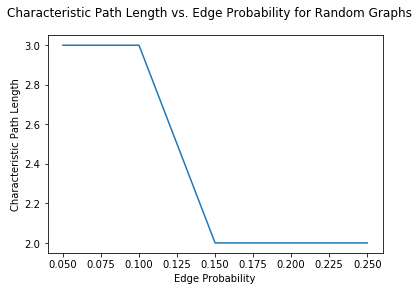

In [17]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy

#Store characteristic path lengths
pathLengths = []
probs = []

for p in range(1, 6):
    #Calculate probability of edge between any two nodes (will vary between 0.05 and 0.5 depending on p)
    prob = float(p * 0.05)
    #Make random graph with edge prob 'prob', 100 nodes
    rg = RandomGraph.RandomGraph()
    for i in range(1,101):
        rg.add_vertex(i)
    rg.add_random_edges(prob)

    #Evalute characteristic path length
    rgPathLength = GraphProperties.characteristicPathLength(rg)
    
    #Store results
    pathLengths.append(rgPathLength)
    probs.append(prob)

#Plot results
fig = plt.figure()
fig.suptitle('Characteristic Path Length vs. Edge Probability for Random Graphs')
plt.plot(probs, pathLengths)
plt.ylabel('Characteristic Path Length')
plt.xlabel('Edge Probability')
plt.show()

The above plot depicts how the characteristic path lengths of random graphs vary with the probability *p* of there being an edge between any two nodes. Clearly, the characteristic path length (which is already quite low to begin with), very quickly falls to a minimum.

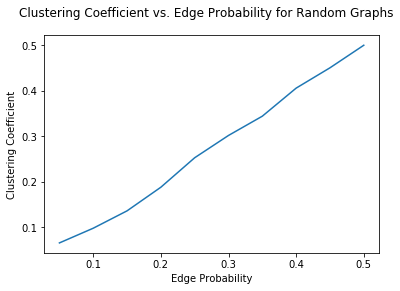

In [2]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy

#Store clustering coefficients
clusteringCoefficients = []
probs = []

for p in range(1, 11):
    #Calculate probability of edge between any two nodes (will vary between 0.05 and 0.5 depending on p)
    prob = float(p * 0.05)
    #Make random graph with edge prob 'prob', 100 nodes
    rg = RandomGraph.RandomGraph()
    for i in range(1,101):
        rg.add_vertex(i)
    rg.add_random_edges(prob)

    #Evalute clustering coefficient
    rgClusteringCoefficient = GraphProperties.clusteringCoefficient(rg)
    
    #Store results
    clusteringCoefficients.append(rgClusteringCoefficient)
    probs.append(prob)

#Plot results
fig = plt.figure()
fig.suptitle('Clustering Coefficient vs. Edge Probability for Random Graphs')
plt.plot(probs, clusteringCoefficients)
plt.ylabel('Clustering Coefficient')
plt.xlabel('Edge Probability')
plt.show()

The above plot depicts how the clustering coefficient of a random graph changes with the probability *p* of there being an edge between any two nodes. Clearly, as *p* increases, the clustering coefficient increases alongside it. The relationship appears to be almost linear. Once again, this is an expected result, as a higher *p* value would result in more edges among vertices within the graph.

## Small World Properties
The above simulations have all shown that:
- Random graphs seem to have inherently low clustering (unless probability *p* is very high) and low path lengths
- Regular graphs seem to have inherently high clustering and high path lengths (unless nodal degree is very high)

Unfortunately, neither are characteristic of real-world social networks. Unlike what many may expect, social networks tend to have:
- High clustering, and
- Low path lengths

The **Stanley Milgram Small World Experiment** suggested that there are no more than 6 degress of separation between any two people in the world. This suggests inherently low characteristic path lengths in social networks. However, at the same time, social networks also have very high clustering, with friends of friends typically knowing each other directly as well.

In response to this, **Watts and Strogatz** devised a model for generating graphs with these small world properties:
1. Start off with a ring lattice (a regular graph arranged in a ring, with each node connected to it's *k/2* nearest clockwise and anti-clockswise neighbours, where the degree of the graph is *k*)
2. Starting with a vertex, consider it's edge to it's nearest clockwise neighbour. With probability *p*, reconnect this edge to a vertex chosen uniformly at random over the entire graph, with duplicate edges forbidden. Otherwise, leave the edge in place
3. Repeat this process moving clockwise around the ring, considering each vertex in turn until one lap is completed
4. Next, consider the edges that connect vertices to their second-nearest clockwise neighbours, and randomly rewire them with probability *p*
5. Repeat this process *k/2* times, until every node's clockwise neighbours have all been considered. At this point, every edge in the graph has been considered once.

On a graph of degree *k*, there wil thus be *k/2* loops (as each node has *k/2* clockwise and *k/2* anti-clockwise neighbours).

An implementation of this rewiring procedure is shown below.

In [ ]:
import Graph
import random

class SmallWorldGraph(Graph):

    def rewire(self, p):
        "Probabilistically rewires the edges in the graph to produce a Watts-Strogatz model of a small-world graph"

        #Start from ring lattice
        vertices = self.g.vertices()
        numVertices = len(vertices)

        #Get degree of vertices
        k = len(self.g[vertices[0]])
        numLoops = k/2

        #We have k/2 total loops. Within each loop, we loop over all nodes and probabilistically rewire an edge
        for i in range(k/2):

            #Loop over all nodes
            for index in range(numVertices):

                #Check link to (i+1)th nearest neighbour in clockwise direction, and probabilistically rewire it
                neighbourIndex = (index + i + 1) % numVertices

                #Get edge between current node and its (i+1)th nearest neighbour in clockwise direction
                e = self.g.get_edge(vertices[index], vertices[neighbourIndex])

                #Determine whether or not it will be rewired
                if(random.random() <= p):
                    #It's getting rewired. Pick a node to move the edge to, disallowing duplicate edges and loops
                    self.g.remove_edge(e) #Remove old edge
                    found = False
                    targetIndex = 0
                    #Find vertex for new edge
                    while(not found):
                        targetIndex = random.randint(0,numVertices-1)
                        if (targetIndex != index and targetIndex != neighbourIndex):
                            #It's not a loop. Make sure it isn't a duplicate
                            eCheck = self.g.get_edge(vertices[index], vertices[targetIndex])
                            if(eCheck == False):
                                found = True #Not a duplicate
                        if(found):
                            #We've found the new node. Rewire the edge by removing the old edge and adding a new one
                            newEdge = Graph.Edge(vertices[index], vertices[targetIndex])
                            self.g.add_edge(newEdge) #Add new edge

                else:
                    #Leave it be
                    pass

Using this implementation, two simulations have been run to demonstrate the relationship between:
- The edge rewiring probability *p* and the characteristic path length of the graph
- The edge rewiring probability *p* and the clustering coefficienty of the graph

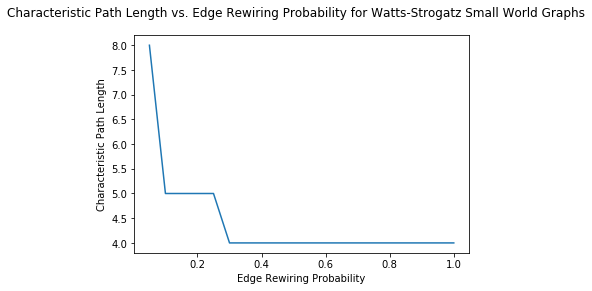

In [3]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy
import SmallWorldGraph

#Store characteristic path lengths
pathLengths = []
probs = []

for p in range(1, 21):
    #Calculate edge rewiring probability
    prob = float(p * 0.05)
    #Make small world graph (using Watts-Strogatz model) with rewiring probability of 'prob', 100 nodes
    smg = SmallWorldGraph.SmallWorldGraph()
    for i in range(1,101):
        smg.add_vertex(i)
    smg.add_regular_edges(4)
    smg.rewire(prob)

    #Evalute characteristic path length
    smgPathLength = GraphProperties.characteristicPathLength(smg)
    
    #Store results
    pathLengths.append(smgPathLength)
    probs.append(prob)

#Plot results
fig = plt.figure()
fig.suptitle('Characteristic Path Length vs. Edge Rewiring Probability for Watts-Strogatz Small World Graphs')
plt.plot(probs, pathLengths)
plt.ylabel('Characteristic Path Length')
plt.xlabel('Edge Rewiring Probability')
plt.show()

Clearly, what can be seen here is that as the rewiring probability increases, the characteristic path length decreases. With a probability of roughly *0.15-0.2*, the path length falls to roughly 5, and then falls slightly further from there with increases probabilities, reaching a minimum value of 4. The path lengths seen when *p* is between *~0.1* and *~0.25* agree with the **Stanley Milgram Small World Experiment**, which theorizes that there are at most 6 degrees of separation betwee any two people in the world.

Running the same simulation and testing the clustering coefficient reveals:

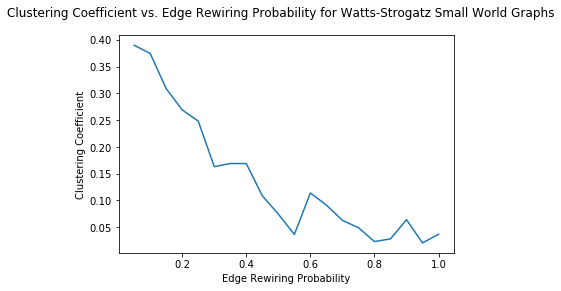

In [4]:
import Graph
import RandomGraph
import GraphProperties
import matplotlib.pyplot as plt
import numpy
import SmallWorldGraph

#Store characteristic path lengths
clusteringCoefficients = []
probs = []

for p in range(1, 21):
    #Calculate edge rewiring probability
    prob = float(p * 0.05)
    #Make small world graph (using Watts-Strogatz model) with rewiring probability of 'prob', 100 nodes
    smg = SmallWorldGraph.SmallWorldGraph()
    for i in range(1,101):
        smg.add_vertex(i)
    smg.add_regular_edges(4)
    smg.rewire(prob)

    #Evalute characteristic path length
    smgClusteringCoefficient = GraphProperties.clusteringCoefficient(smg)
    
    #Store results
    clusteringCoefficients.append(smgClusteringCoefficient)
    probs.append(prob)

#Plot results
fig = plt.figure()
fig.suptitle('Clustering Coefficient vs. Edge Rewiring Probability for Watts-Strogatz Small World Graphs')
plt.plot(probs, clusteringCoefficients)
plt.ylabel('Clustering Coefficient')
plt.xlabel('Edge Rewiring Probability')
plt.show()

As can be seen, the clustering coefficient decreasesas the edge rewiring probability increases. Notably, at low probabilities (once again, roughly *0.1 - 0.25*) there is still high clustering.

Based on the two sets of results produced above (characteristic path length and clustering coefficient), it can be seen that at low edge rewiring probabilities, roughly around 0.15, the Watts-Strogatz model of graph generation produces graphs with small world properties:
- High clustering, and
- Low characteristic path lengths

This model thus produces graphs that bear resemblance to real social networks, in that they have both high clustering and low path lengths.

## A Note on Implementation
In order to produce the above results, it was necessary to produce implementations of several algorithms:
- A shortest path algorithm for evaluating characteristic path lenghts
- An algorithm for evaluating clustering coefficients
- An algorithm for producing regular graphs of a specified degree *k* (a ring lattice)
- An implementation of a random graphs

Some of these implementations are shown below

### Random Graph Implementation
(This implementation is also contained in RandomGraph.py, which is imported and used by most of the code snippets within this notebook)

In [ ]:
import random
import Graph

class RandomGraph(Graph.Graph):

    def add_random_edges(self, p=0.05):
        #Starts with an edgeless graph and adds edges at random, with a probability of p for any edge between two nodes to exist
        nodes = self.vertices()
        i = 0
        j = 0
        for v in nodes:
            for w in nodes:
                #Add edge between two nodes with probability p (if they're different nodes)
                if(j <= i):
                    j = j + 1
                    continue
                j = j + 1
                if(random.random() <= p):
                    self.add_edge(Graph.Edge(v,w))
            i = i + 1
            j = 0


### Clustering Coefficients, Characteristic Path Lengths, and Shortest Path Algorithm
(These implementations are all contained in GraphProperties.py, which is imported and used by all of the code snippets within this notebook)

In [ ]:
import Graph
import RandomGraph
from collections import deque

def BFS(g, source, goal):
    #Use BFS to find shortest path length
    numVisited = 0
    #Set up visited and previous dictionaries
    visited = {}
    prev = {}
    for key in g:
        visited[key] = False
        prev[key] = None
    #Set up queue
    q = deque([source])
    #Search graph
    while(len(q)!=0 and not visited[goal]):
        #Pop head of queue
        curNode = q.popleft()
        #Mark node as visited
        visited[curNode] = True
        numVisited = numVisited + 1
        #Search all adjacent nodes
        neighbours = g.out_vertices(curNode)
        for neighbour in neighbours:
            if(visited[neighbour] == False and not (neighbour in q)):
                #Add neighbour to q if it's unvisited, and not already in q
                q.append(neighbour)
                prev[neighbour] = curNode

    #Determine path from source to goal (start at goal and trace back parents to source)
    if(visited[goal]):
        path = []
        path.append(goal)
        parent = prev[goal]
        while(parent != None):
            path.append(parent)
            parent = prev[parent]
        return len(path)
    else:
        return -1

def characteristicPathLength(graph):
    #Find all pairs of vertices
    vertices = graph.vertices()
    pairs = []
    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            source = vertices[i]
            dest = vertices[j]
            pair = (source, dest)
            pairs.append(pair)
    #Calculate all path lengths
    sumOfPathLengths = 0
    for pair in pairs:
        dist = BFS(graph, pair[0], pair[1])
        sumOfPathLengths = sumOfPathLengths + dist
    #Calculate and return average
    avg = float(sumOfPathLengths/len(pairs))
    return avg

def getNumEdges(g, nodeSet):
    #Given a graph, and a subset of nodes from the graph, calculate the number of edges between them
    numEdges = 0
    for i in range(len(nodeSet)):
        for j in range(i+1, len(nodeSet)):
            #Check if there is an edge between these two nodes
            e = g.get_edge(nodeSet[i], nodeSet[j])
            if(e):
                numEdges = numEdges + 1
    return numEdges

def clusteringCoefficient(g):
    #Retrieve all nodes of graph
    nodes = g.vertices()
    sumOfCoefficients = float(0.0)

    #Calculate each nodes clustering coefficient
    for node in nodes:
        #Get all of the nodes neighbours
        neighbours = g.out_vertices(node)
        #Calculate the maximum number of edges that can exist between all of the neighbours
        maxNumEdges = float(float(len(neighbours))*float((len(neighbours)-1)/float(2.0)))
        #Calculate the number of edges that actually exist between them
        numActualEdges = getNumEdges(g, neighbours)
        #Calculate the coefficient
        nodeCoefficient = 0.0
        if(maxNumEdges != 0):
            nodeCoefficient = float(numActualEdges/maxNumEdges)
        sumOfCoefficients = float(float(sumOfCoefficients) + float(nodeCoefficient))

    #Calculate the clustering coefficient of the graph
    coefficient = float(float(sumOfCoefficients)/float(len(nodes)))
    return coefficient

### Shortest Path Algorithm
As can be seen above, the shortest path algorithm used to find the characteristic path length is a regular breadth-first search (BFS). This is a sufficient algorithm, as a BFS is always guaranteed to return the shortest path when edges are unweighted. While Dijkstra's algorithm is recommended by the textbook, there are no differences between Dijkstra's algorithm and a BFS when a graph is unweighted (in fact, Dijkstra's algorithm on an unweighted is simply a BFS).

This algorithm is simply used individually on every pair of nodes within the graph, and the path lengths are all averaged to find the characteristic path length of the graph.

There are algorithms, such as the *Floyd-Warshall* algorithm, that solve the *all-pairs shortest-path* problem.